<a href="https://colab.research.google.com/github/OWEN-JUN/keras_/blob/master/day0730_colab_keras24_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import * #sequential
from keras.layers import * #dense, dropout, flatten, conv2d, maxpooling2d
from keras.callbacks import * #modelcheckpoint, earlystopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numba

import os
import tensorflow as tf

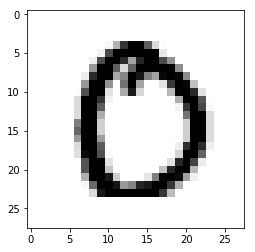

In [111]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()
digit = x_train[88]
plt.imshow(digit, cmap=plt.cm.binary)

x_train, _, y_train, _ = train_test_split(x_train, y_train, random_state=66, test_size = 0.995)

x_train = x_train.reshape(x_train.shape[0],28,28,1).astype("float32")/255
# print(x_train[0])





# x_train = x_train.reshape(x_train.shape[0],28,28,1).astype("float32")/255

x_test = x_test.reshape(x_test.shape[0],28,28,1).astype("float32")/255

y_train= np_utils.to_categorical(y_train)

y_test= np_utils.to_categorical(y_test)

In [116]:
model = Sequential()
#conv 신경망 설정

model.add(Conv2D(100,kernel_size=(3,3), input_shape=(28,28,1),activation="relu",kernel_regularizer=regularizers.l1(0.08),padding="same"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(4,4),activation="relu"))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=4))
model.add(Flatten())
model.add(Dense(1500, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(350, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(30, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


early_stoping_callback = EarlyStopping(monitor="val_loss",patience=20)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 300, batch_size=100, verbose=2, callbacks=[early_stoping_callback])

print("\n test acc: %.4f"%(model.evaluate(x_test, y_test)[1]))



Train on 300 samples, validate on 10000 samples
Epoch 1/300
 - 8s - loss: 5.0790 - acc: 0.1033 - val_loss: 4.9284 - val_acc: 0.1754
Epoch 2/300
 - 0s - loss: 4.8540 - acc: 0.1200 - val_loss: 4.7238 - val_acc: 0.1480
Epoch 3/300
 - 0s - loss: 4.6523 - acc: 0.1267 - val_loss: 4.5260 - val_acc: 0.1555
Epoch 4/300
 - 0s - loss: 4.4524 - acc: 0.1667 - val_loss: 4.3279 - val_acc: 0.1699
Epoch 5/300
 - 0s - loss: 4.2400 - acc: 0.1633 - val_loss: 4.1325 - val_acc: 0.1444
Epoch 6/300
 - 0s - loss: 4.0670 - acc: 0.1433 - val_loss: 3.9271 - val_acc: 0.2133
Epoch 7/300
 - 0s - loss: 3.8545 - acc: 0.1833 - val_loss: 3.7309 - val_acc: 0.3492
Epoch 8/300
 - 0s - loss: 3.6261 - acc: 0.2500 - val_loss: 3.5052 - val_acc: 0.4470
Epoch 9/300
 - 0s - loss: 3.4646 - acc: 0.2333 - val_loss: 3.2834 - val_acc: 0.4630
Epoch 10/300
 - 0s - loss: 3.2531 - acc: 0.3033 - val_loss: 3.0954 - val_acc: 0.4889
Epoch 11/300
 - 0s - loss: 3.0610 - acc: 0.3000 - val_loss: 2.9253 - val_acc: 0.4313
Epoch 12/300
 - 0s - loss:

In [113]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [7]:
print(history.history["val_loss"])

[0.19339552223682405, 0.08674282450228929, 0.059862727858126165, 0.04579912014305591]


In [10]:
print(history.history)

{'val_loss': [0.19339552223682405, 0.08674282450228929, 0.059862727858126165, 0.04579912014305591], 'val_acc': [0.9408999890089035, 0.9731000036001205, 0.9801999926567078, 0.9854000002145767], 'loss': [0.7055103242397308, 0.20917378924787045, 0.12302140928804875, 0.0907871287316084], 'acc': [0.7858999989926815, 0.938333337008953, 0.9642666667699814, 0.9737333357334137]}


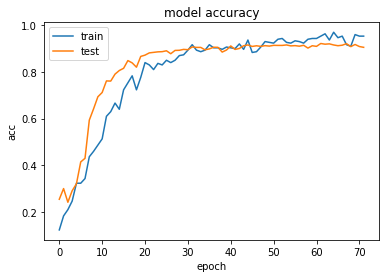

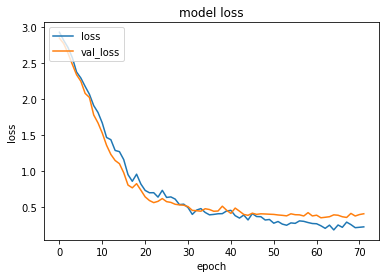

In [57]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])

plt.title("model accuracy")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.legend(["train","test"], loc="upper left")
plt.show()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["loss","val_loss"], loc="upper left")
plt.show()

In [59]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
x = np.array(range(len(history.history["acc"])))
y = np.array(history.history["acc"])
x1= np.array(range(len(history.history["val_acc"])))
y1 = np.array(history.history["val_acc"])

# plt.plot(history.history["acc"])
# plt.plot(history.history["val_acc"])
print(x)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
[0.12333333 0.18333334 0.21       0.24666667 0.32333333 0.32333334
 0.34333333 0.43666667 0.46       0.48666666 0.51333334 0.61000001
 0.63000001 0.66666666 0.64000001 0.72333334 0.75333333 0.78333334
 0.72333333 0.77666666 0.83999999 0.82999999 0.81       0.83666666
 0.82999999 0.84999999 0.83999999 0.84999999 0.86999998 0.87333333
 0.89333334 0.91666665 0.89333333 0.88666666 0.89333334 0.91666665
 0.90333333 0.90333333 0.89666666 0.90666666 0.90333333 0.9
 0.92       0.89666666 0.93666666 0.88333333 0.88666667 0.90666667
 0.93       0.92666668 0.92333334 0.94       0.94333333 0.92666667
 0.92333334 0.93333334 0.92999999 0.92333332 0.94000001 0.94333333
 0.94333332 0.95333334 0.96333333 0.93666667 0.97       0.94666666
 0.95333333 0.91666667 0.91       0.96       0.953

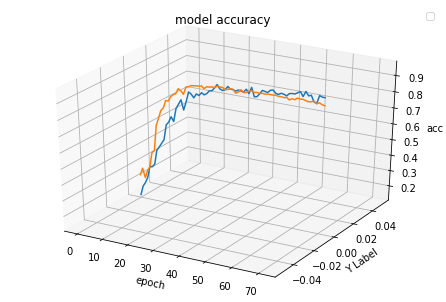

In [60]:
fig = plt.figure()
ax = Axes3D(fig)

plt.title("model accuracy")
# plt.ylabel("acc")
# plt.xlabel("epoch")
plt.legend(["train","test"])



ax.plot(xs=x, ys=[0]*len(x), zs=y, zdir='z', label='ys=0, zdir=z')
ax.plot(xs=x1, ys=[0]*len(x1), zs=y1, zdir='z', label='ys=0, zdir=z')
ax.set_xlabel("epoch")
ax.set_ylabel('Y Label')
ax.set_zlabel('acc')
# ax1.plot(xs=x1, ys=[0]*len(x1), zs=y1, zdir='z', label='ys=0, zdir=z')
plt.show()

In [61]:
model = Sequential()
#conv 신경망 설정

model.add(Conv2D(64,kernel_size=(2,2), input_shape=(28,28,1),activation="relu",kernel_regularizer=regularizers.l1(0.03),padding="same"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64,(4,4),activation="relu",padding="same"))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=3))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1500, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(350, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(30, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


early_stoping_callback = EarlyStopping(monitor="val_acc",patience=20)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 300, batch_size=30, verbose=2, callbacks=[early_stoping_callback])

print("\n test acc: %.4f"%(model.evaluate(x_test, y_test)[1]))



Train on 300 samples, validate on 10000 samples
Epoch 1/300
 - 3s - loss: 2.8478 - acc: 0.0900 - val_loss: 2.7717 - val_acc: 0.1218
Epoch 2/300
 - 1s - loss: 2.7363 - acc: 0.1167 - val_loss: 2.6857 - val_acc: 0.1761
Epoch 3/300
 - 1s - loss: 2.6172 - acc: 0.1467 - val_loss: 2.5554 - val_acc: 0.1154
Epoch 4/300
 - 1s - loss: 2.4929 - acc: 0.2200 - val_loss: 2.4299 - val_acc: 0.1336
Epoch 5/300
 - 1s - loss: 2.3170 - acc: 0.2433 - val_loss: 2.2294 - val_acc: 0.3685
Epoch 6/300
 - 1s - loss: 2.1755 - acc: 0.2933 - val_loss: 2.0979 - val_acc: 0.5389
Epoch 7/300
 - 1s - loss: 2.0191 - acc: 0.3467 - val_loss: 1.8185 - val_acc: 0.6078
Epoch 8/300
 - 1s - loss: 1.7117 - acc: 0.4967 - val_loss: 1.5286 - val_acc: 0.7269
Epoch 9/300
 - 1s - loss: 1.6018 - acc: 0.4833 - val_loss: 1.3591 - val_acc: 0.7206
Epoch 10/300
 - 1s - loss: 1.4311 - acc: 0.5333 - val_loss: 1.2018 - val_acc: 0.7661
Epoch 11/300
 - 1s - loss: 1.3029 - acc: 0.6200 - val_loss: 1.0707 - val_acc: 0.7571
Epoch 12/300
 - 1s - loss:

In [94]:
input1 = Input(shape=(28,28,1))
layer1 = Conv2D(200,kernel_size=(2,2),activation="relu",kernel_regularizer=regularizers.l1(0.03),padding="same")(input1)
layer1_1 = MaxPooling2D(pool_size=2)(layer1)
layer1_2 = Conv2D(64,(4,4),activation="relu",padding="same")(layer1_1)
layer1_3 = Dropout(0.5)(layer1_2)
layer1_4 = Flatten()(layer1_3)
layer1_5 = Dense(1500, activation="relu")(layer1_4)
layer1_6 = Dense(350, activation="relu")(layer1_5)
layer1_7 = Dropout(0.3)(layer1_6)
layer1_8= Dense(200, activation="relu")(layer1_7)
layer1_9 = Dropout(0.3)(layer1_8)


layer2 = Conv2D(300,kernel_size=(2,2),activation="relu",kernel_regularizer=regularizers.l1(0.03),padding="same")(input1)
layer2_1 = AveragePooling2D(pool_size=2)(layer2)
layer2_2 = Conv2D(64,(4,4),activation="relu",padding="same")(layer2_1)
layer2_3 = Dropout(0.5)(layer2_2)
layer2_4 = Flatten()(layer2_3)
layer2_5 = Dense(1500, activation="relu")(layer2_4)
layer2_6 = Dense(350, activation="relu")(layer2_5)
layer2_7 = Dropout(0.3)(layer2_6)
layer2_8= Dense(200, activation="relu")(layer2_7)
layer2_9 = Dropout(0.3)(layer2_8)




merge1 = concatenate([layer1_9, layer2_9])
middle1 = Dense(500)(merge1)
middle2 = Dense(300)(middle1)
middle3 = Dense(200)(middle2)
middle4 = Dense(300)(middle3)
middle5 = Dense(100)(middle4)
middle6 = Dense(10,activation="softmax")(middle5)


model = Model(inputs = input1, outputs=[middle6])
early_stoping_callback = EarlyStopping(monitor="val_acc",patience=50)
model.compile(loss="MSE", optimizer="adam", metrics=['accuracy'])
model.fit(x_train, y_train, epochs=300, batch_size=100, validation_data=(x_test, y_test), callbacks=[early_stoping_callback])
print("\n test acc: %.4f"%(model.evaluate(x_test, y_test)[1]))





W0730 02:23:50.746100 140492994553728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



Train on 900 samples, validate on 10000 samples
Epoch 1/300
900/900 [==============================] - 8s 9ms/step - loss: 2.2048 - acc: 0.2167 - val_loss: 1.9257 - val_acc: 0.2611
Epoch 2/300
900/900 [==============================] - 2s 2ms/step - loss: 1.7100 - acc: 0.4322 - val_loss: 1.4607 - val_acc: 0.5621
Epoch 3/300
900/900 [==============================] - 2s 2ms/step - loss: 1.2679 - acc: 0.7467 - val_loss: 1.0639 - val_acc: 0.7531
Epoch 4/300
900/900 [==============================] - 2s 2ms/step - loss: 0.9019 - acc: 0.8756 - val_loss: 0.7471 - val_acc: 0.7967
Epoch 5/300
900/900 [==============================] - 2s 2ms/step - loss: 0.6099 - acc: 0.9278 - val_loss: 0.4908 - val_acc: 0.8219
Epoch 6/300
900/900 [==============================] - 2s 2ms/step - loss: 0.3790 - acc: 0.9644 - val_loss: 0.3002 - val_acc: 0.8205
Epoch 7/300
900/900 [==============================] - 2s 2ms/step - loss: 0.2143 - acc: 0.9711 - val_loss: 0.1667 - val_acc: 0.8390
Epoch 8/300
900/900 [

KeyboardInterrupt: ignored